In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools            # load data
from scipy import stats     # znorm func
import numpy as np
import networkx as nx

In [4]:
# map cell to cell, add circular cell to goal point

VISUAL = 0
GOAL = 1
IMAGINAL = 2
RETRIEVAL = 3
MOTOR = 4
mappings = {VISUAL:'VISUAL', GOAL:'GOAL', IMAGINAL:'IMAGINAL', RETRIEVAL:'RETRIEVAL', MOTOR:'MOTOR'}

points_list = [VISUAL, GOAL, IMAGINAL, RETRIEVAL, MOTOR]
edges_list = [(VISUAL,GOAL), (VISUAL,IMAGINAL), (GOAL,IMAGINAL), (IMAGINAL,GOAL), (GOAL, RETRIEVAL), (RETRIEVAL, GOAL), (IMAGINAL, RETRIEVAL), (RETRIEVAL, IMAGINAL), (RETRIEVAL, RETRIEVAL), (IMAGINAL, MOTOR)]

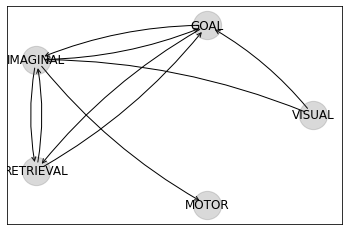

In [5]:
G=nx.DiGraph()
G.add_nodes_from(points_list)
G.add_edges_from(edges_list)
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G,pos, node_color='#444', alpha=.2, node_size=800)
nx.draw_networkx_edges(G,pos, width=1, arrows=True, arrowstyle="->", connectionstyle="arc3,rad=0.1")
nx.draw_networkx_labels(G,pos, mappings, horizontalalignment='center', verticalalignment='center')
plt.show()

In [6]:
goal = MOTOR

In [7]:
# how many points in graph? x points
MATRIX_SIZE = 5

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [8]:
for edge in edges_list:
    print(edge)
    if edge[1] == goal:
        R[edge] = 100
    else:
        R[edge] = 0

    if edge[0] == goal:
        R[edge[::-1]] = 100
    else:
        # reverse of point
        R[edge[::-1]]= 0

(0, 1)
(0, 2)
(1, 2)
(2, 1)
(1, 3)
(3, 1)
(2, 3)
(3, 2)
(3, 3)
(2, 4)


In [9]:
# add goal point round trip
R[goal, goal]= 100

R

matrix([[ -1.,   0.,   0.,  -1.,  -1.],
        [  0.,  -1.,   0.,   0.,  -1.],
        [  0.,   0.,  -1.,   0., 100.],
        [ -1.,   0.,   0.,   0.,  -1.],
        [ -1.,  -1.,   0.,  -1., 100.]])

In [10]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

Q

matrix([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [23]:
# learning parameter
gamma = 0.8
initial_state = 0

def available_actions(state):
    #current_state_row = R[state,]
    av_act = [b for (a,b) in edges_list if a==state]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 
available_act 

[1, 2]

In [24]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

In [28]:
# Training
scores = []
for i in range(100):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

ValueError: 'a' cannot be empty unless no samples are taken

Most efficient path:
[0, 3, 3, 2, 3, 3, 1, 3, 3, 4]


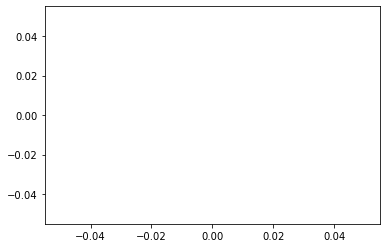

In [29]:
# Testing
current_state = 0
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

In [30]:
Q

matrix([[  0.        , 316.900947  , 393.9471621 ,   0.        ,
           0.        ],
        [315.15772968,   0.        , 396.12618374, 315.15772968,
           0.        ],
        [313.9471621 , 313.9471621 ,   0.        , 315.15772968,
         495.15772968],
        [  0.        , 313.9471621 , 393.9471621 , 315.15772968,
           0.        ],
        [  0.        ,   0.        , 392.43395263,   0.        ,
         493.9471621 ]])